## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

# Definicje

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Wyłączenie FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Krok 1 - Ogólny przegląd danych

In [5]:
# Zaczytanie zbioru danych
df = pd.read_csv('Data_titanic.csv', sep=",")
# Próbka danych (pierwsze i ostatnie rekordy)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [4]:
# Lista 10 losowych rekordów
df.sample(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1123,3.0,1.0,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0.0,2.0,2668,22.3583,NaN,C,D,NaN,NaN
913,3.0,1.0,"Karlsson, Mr. Einar Gervasius",male,21.0,0.0,0.0,350053,7.7958,NaN,S,13,NaN,NaN
742,3.0,1.0,"Dahl, Mr. Karl Edwart",male,45.0,0.0,0.0,7598,8.0500,NaN,S,15,NaN,"Australia Fingal, ND"
1012,3.0,0.0,"McNeill, Miss. Bridget",female,NaN,0.0,0.0,370368,7.7500,NaN,Q,NaN,NaN,NaN
294,1.0,0.0,"Thayer, Mr. John Borland",male,49.0,1.0,1.0,17421,110.8833,C68,C,NaN,NaN,"Haverford, PA"
1017,3.0,1.0,"Midtsjo, Mr. Karl Albert",male,21.0,0.0,0.0,345501,7.7750,NaN,S,15,NaN,NaN
1016,3.0,0.0,"Mernagh, Mr. Robert",male,NaN,0.0,0.0,368703,7.7500,NaN,Q,NaN,NaN,NaN
223,1.0,0.0,"Parr, Mr. William Henry Marsh",male,NaN,0.0,0.0,112052,0.0000,NaN,S,NaN,NaN,Belfast
1109,3.0,0.0,"Paulner, Mr. Uscher",male,NaN,0.0,0.0,3411,8.7125,NaN,C,NaN,NaN,NaN
751,3.0,0.0,"Dantcheff, Mr. Ristiu",male,25.0,0.0,0.0,349203,7.8958,NaN,S,NaN,NaN,"Bulgaria Chicago, IL"


Losowe rekordy wykazują, że dane zawierają braki w niektórych kolumnach (wartość NaN)

In [5]:
# Lista kolumn
print(df.columns)
# Typ danych w kolumnach
df.info()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Mamy 13 kolumn. Te, w których są dane tylko liczbowe (7 kolumn), mają typ float64. Statkiem podróżowało 1309 osób. Nie o wszystkich mamy informacje na temat:
1. age 
1. cabin
1. embarked
1. boat
1. body
1. home.dest

Brak tych informacji może zniekształcić późniejsze analizy i wyciągane wnioski. 

# Krok 1 - Podsumowanie

Ogólny przegląd danych wskazuje, że mamy braki w bazie danych i będzie wymagane uzupełnienie brakujących wartości. Trzeba jednak zwrócić uwagę, że nie wszystkie braki należy uzupełniać. To wymaga dokładniejszej analizy na późniejszym etapie. Obiecujące w analizie wydają się takie parametry jak: 
* pclass
* survived
* age
* sex

# Krok 2 - Analiza brakujących wartości i naprawa błędów

In [6]:
# Zestawienie brakujących wartości (ilościowo i procentowo)
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Przygotowanie DataFrame wyświetlającego zestawienie
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})
missing_values_summary

,Missing Values,Percentage
pclass,1,0.076336
survived,1,0.076336
name,1,0.076336
sex,1,0.076336
age,264,20.152672
sibsp,1,0.076336
parch,1,0.076336
ticket,1,0.076336
fare,2,0.152672
cabin,1015,77.480916


Dane wskazują, że w każdej kolumnie istnieje co najmniej jedna brakująca wartość. Należy sprawdzić, czy nie mamy do czynienia z jakimś pustym wierszem

In [7]:
# Liczba wierszy, w których każda kolumna jest pusta (zawiera wartość NaN)
rows_all_nan = df.isna().all(axis=1).sum() 
print(f"Liczba wierszy, w których każda kolumna jest pusta (zawiera wartość NaN): {rows_all_nan}")

Liczba wierszy, w których każda kolumna jest pusta (zawiera wartość NaN): 1


In [8]:
# Usunięcie wierszy, które mają tylko puste wartości w każdej kolumnie
df = df.dropna(how='all')

In [9]:
# Zestawienie brakujących wartości (ilościowo i procentowo)
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Przygotowanie DataFrame wyświetlającego zestawienie
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})
missing_values_summary

,Missing Values,Percentage
pclass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
age,263,20.091673
sibsp,0,0.000000
parch,0,0.000000
ticket,0,0.000000
fare,1,0.076394
cabin,1014,77.463713


Ze zbioru danych zostały usunięte całe puste rekordy (był jeden taki rekord)

Jest  wymagane uzupełnienie brakujących wartości. Trzeba jednak zwrócić uwagę, że tam gdzie szczególnie dużo brakuje informacji, brak informacji jest też informacją. W kolumnach: 
* body - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione). Brak wartości oznacza, że albo ciało nie zostało odnalezione, albo pasażer przeżył
* boat - Numer łodzi ratunkowej. Brak wartości może oznaczać, że pasażer nie przeżył
Wydaje się że powyższych wartości nie powinniśmy uzupełniać losowymi wartościami
* cabin - numer kabiny. Brak wartości może mieć wpływ na analizę przeżywalności w stosunku od miejsca na pokładzie. Jednak większość osób nie posiada tej informacji. Sztucze ich generowanie dla większości nie ma sensu, ponieważ bardzo zaburzy wyciągane z tego wnioski
* home.dest - miejsce docelowe. Brakuje około 50% wartości

Powyższych kolumn nie będę uzupełniał brakującymi wartościami.
Kolumny wymagające uzupełnienie braków:
* age
* fare
* embarked

In [10]:
# Uzupełnienie braków w kolumnie "age"
df = df.copy()
df["age"] = df.groupby(["sex"], group_keys=False)["age"].apply(lambda x: x.fillna(x.median()))

In [11]:
# Uzupełnienie braków w kolumnie "fare"
df["fare"].fillna(df["fare"].median(), inplace=True)

In [12]:
# Uzupełnienie braków w kolumnie "embarked" trybem (najczęstszą wartością)
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

In [13]:
# Zestawienie brakujących wartości (ilościowo i procentowo)
missing_values_count = df.isnull().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Przygotowanie DataFrame wyświetlającego zestawienie
missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage': missing_values_percentage
})
missing_values_summary

,Missing Values,Percentage
pclass,0,0.000000
survived,0,0.000000
name,0,0.000000
sex,0,0.000000
age,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
ticket,0,0.000000
fare,0,0.000000
cabin,1014,77.463713


W danych nie ma już pustych wartości w trzech kolumnach: age, fare, embarked

In [14]:
# Podstawowe statystyki
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,29.443596,0.498854,0.385027,33.281086,160.809917
std,0.837836,0.486055,12.914362,1.041658,0.865560,51.741500,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Podstawowe statystyki pokazują, że:
1. większość osób miało bilet klasy 3
1. większość osób nie przeżyło
1. osoby były raczej młode (około 30 lat), choć są skrajne wyjątki (noworodek 0,1 roku i 80-latek)
1. większość osób podróżowała bez osoby towarzyszącej/rodzeństwa i nie miała na pokładzie swoich rodziców

In [15]:
# Sprawdzenie unikalności danych
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [16]:
# Wyświetl liczbę zduplikowanych wierszy
duplicates = df.duplicated().sum()  
print("Liczba zduplikowanych wierszy:", duplicates)

Liczba zduplikowanych wierszy: 0


# Krok 2 - Podsumowanie

Analiza brakujących wartości zakończyła się następującymi wnioskami:
1. Usunąłem jeden całkiem pusty wiersz
1. Uzupełniłem braki ale tylko w tych kolumnach, które miały braki do około 20%. Kolumny z brakami powyżej 20% pozostały bez zmian. Uzupełnienie ich wartościami mogłoby zaburzyć wyniki oraz wnioski jakie na podstawie tych danych można byłoby wyciągać, gdyż wnioski bazowałyby na danych w większości sztucznie wygenerowanych

# Krok 3 – Analiza pojedynczych zmiennych

### Analiza histogramów dla kolumn numerycznych

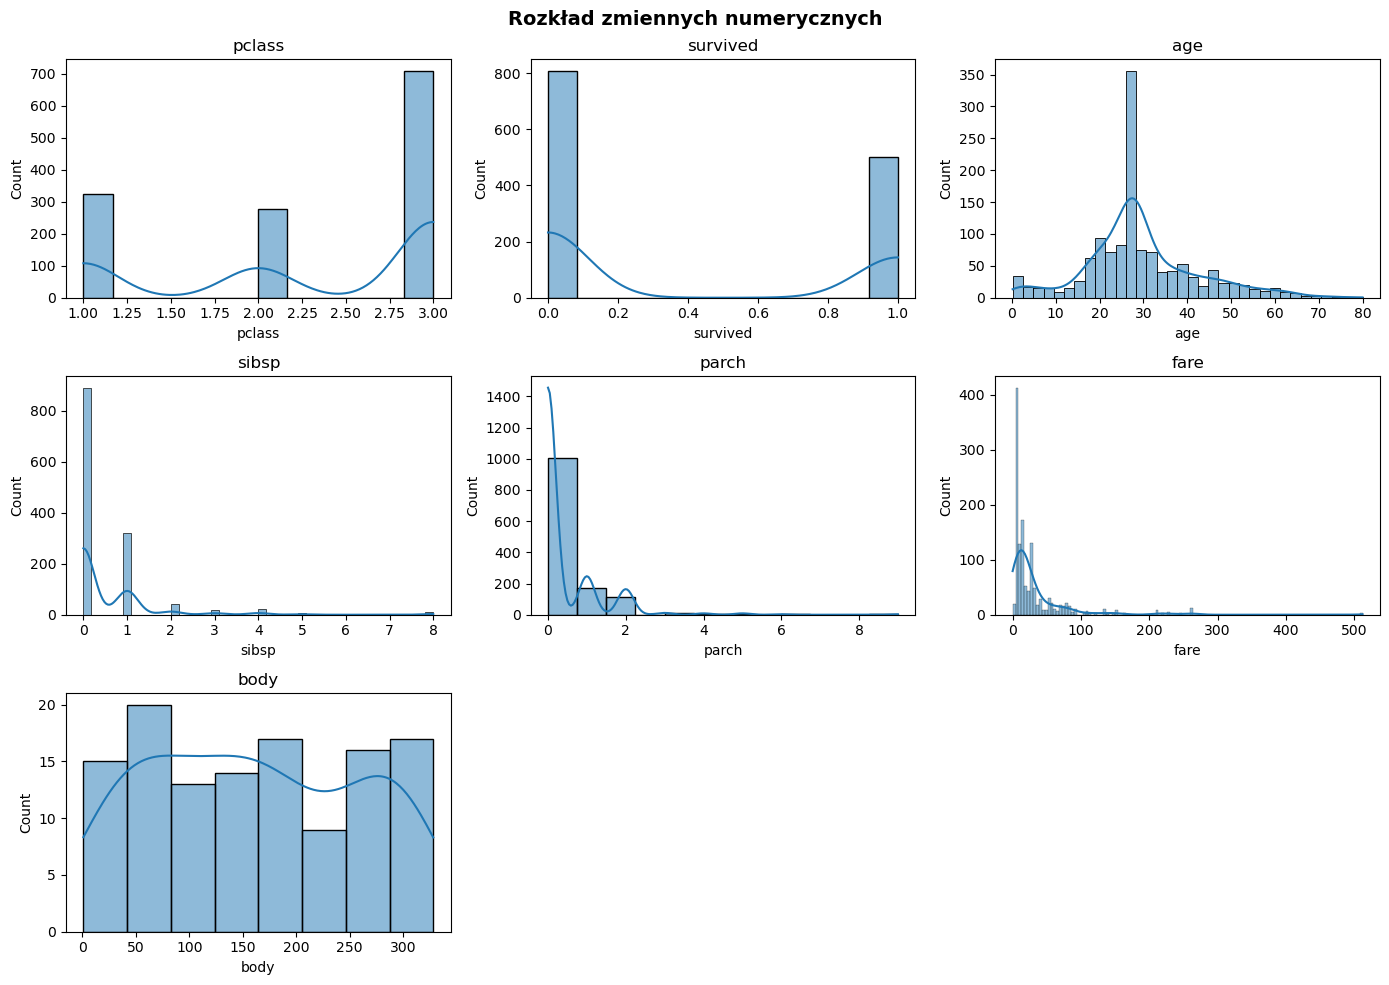

In [35]:
# Histogram dla wszystkich kolumn numerycznych

# Przygotowanie listy kolumn numerycznych
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Przygotowanie rozmiaru diagramu
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()

# Przygotowanie histogramów za pomocą KDE dla każdej kolumny liczbowej
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(col)

# Usuń wszystkie puste podwykresy
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Rozkład zmiennych numerycznych', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Podsumowanie poszczególnych histogramów:
* 'pclass' - większość osób podróżowało w klasie 3
* 'survived' - przeżyło nieco mniej niż 40% osób
* 'sex' - większość podróżujących osób to mężczyźni
* 'age' - większość osób było w wieku od 20 do 40 lat
* 'sibsp' - zdecydowana większość osób podróżowała samotnie
* 'parch'- większość osób nie maiła rodzeństwa ani rodziców na pokładzie
* 'fare' - przeważająca większość osób na pokładzie zapłaciła niską kwotę za bilet (czyli kupiła bilet najniższej klasy)
* 'body'- ten diagram trudno przeanalizować w tej postaci

### Analiza histogramów dla kolumn kategorycznych

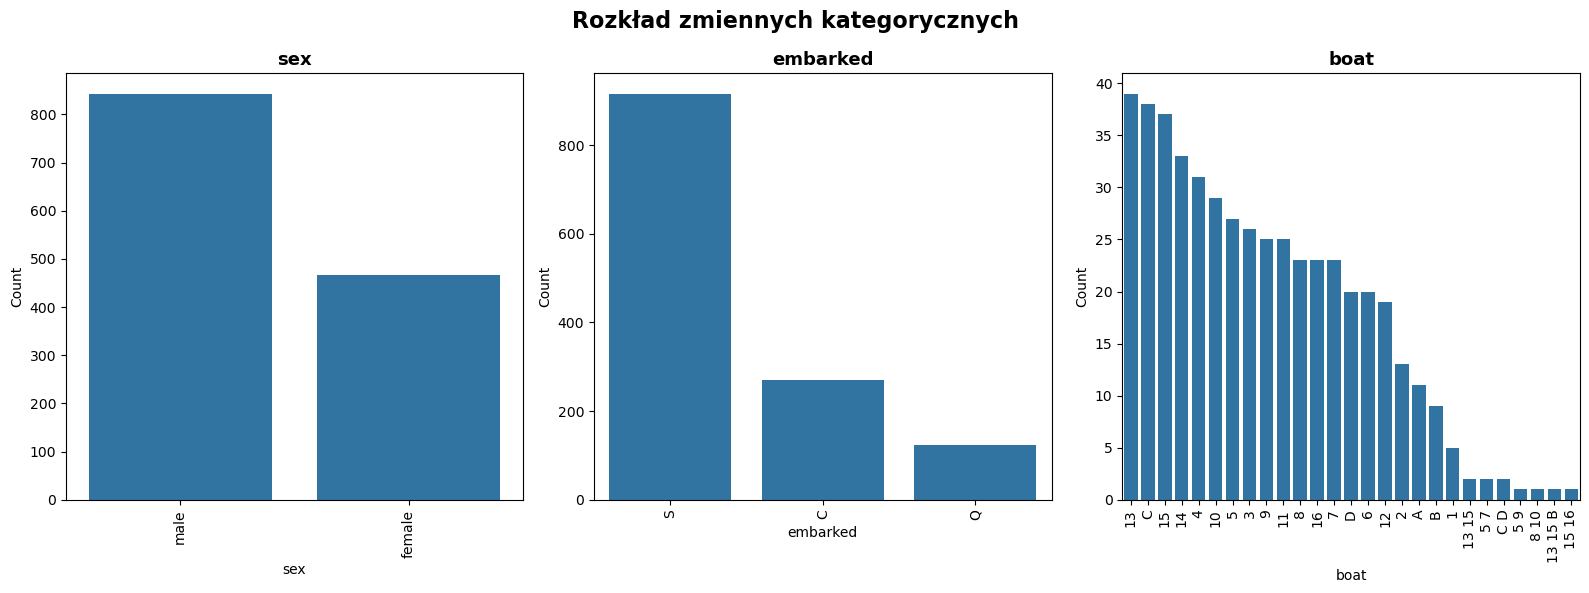

In [18]:
cat_vars = ['sex', 'embarked', 'boat']
n = len(cat_vars)
n_cols = 3
n_rows = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6))
axes = axes.flatten()

# Wykresy dla sex, embarked, boat
for idx, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, order=df[var].value_counts().index, ax=axes[idx])
    axes[idx].set_title(f'{var}', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].grid(False)

plt.suptitle('Rozkład zmiennych kategorycznych', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1,1])
plt.show()       

Podsumowanie poszczególnych histogramów:
* 'sex' - większość osób stanowili mężczyźni
* 'embarked' - większość osób wchodziła na pokład w porcie w Southampton
* 'boat' - najwięcej osób przewiozła łódź ratunkowa nr 13

### Analiza Boxplot wartości odstających

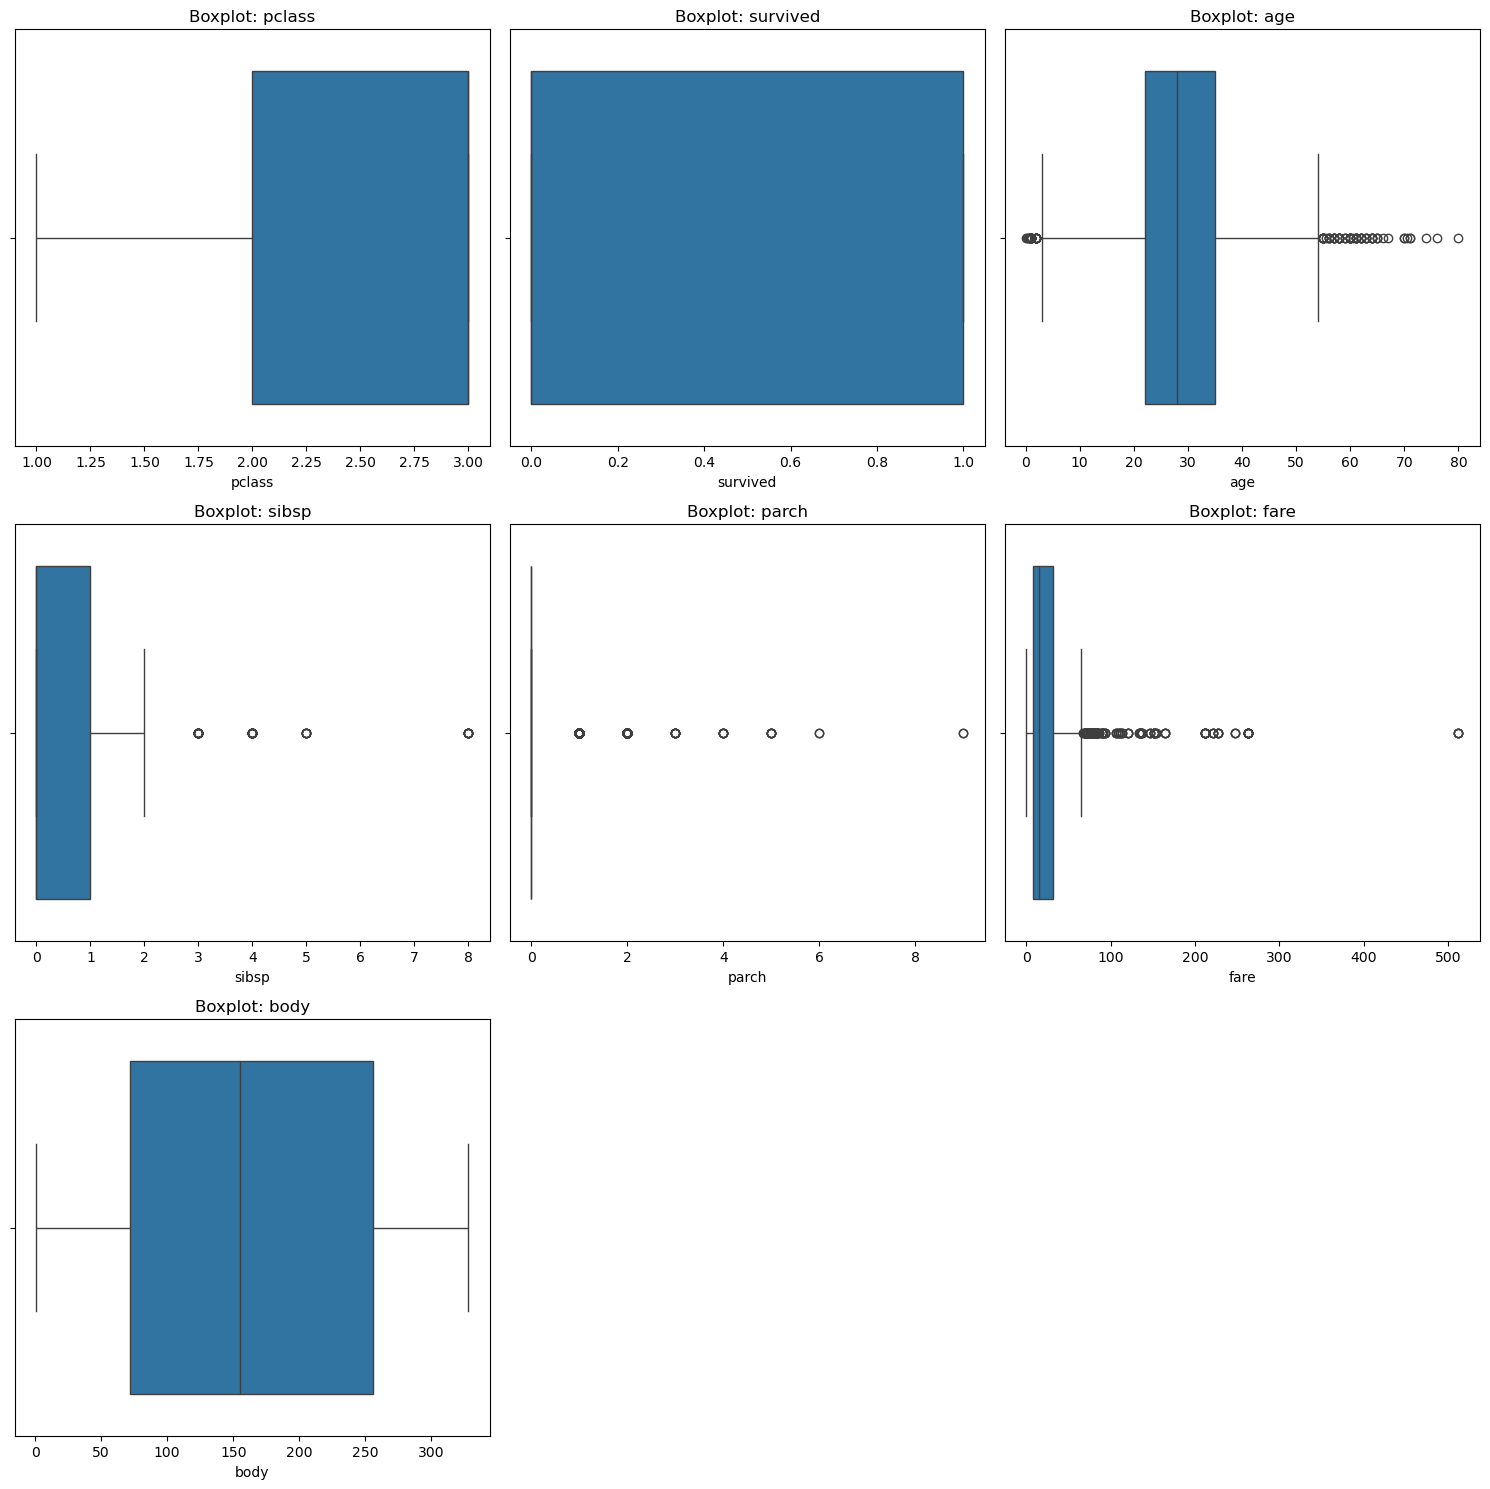

In [34]:
# Wybierz kolumny numeryczne
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Przygotowanie siatki wykresów
num_plots = len(numerical_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

# Rysowanie boxplotów
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")

# Usunięcie pustych wykresów
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Podsumowanie poszczególnych wartości odstających:

Nie każdy boxplot wskazuje informacje, które warte są analizy. Poniżej te najciekawsze:
* age - występują nieliczne przypadki osób w wieku wyraźnie odstającym od pozostałych. Są one poniżej około 1 roku i powyżej około 55 roku. Jednak nie są to pomijalne wartości. Warto sprawdzić jak wyglądała ich przeżywalność
* sibsp - występuje bardzo mało (pomijalnie) wartości odstających
* parch- - występuje bardzo mało (pomijalnie) wartości odstających
* fare - występują nieliczne przypadki osób, które zapłaciły wyraźnie więcej od pozostałych. Warto sprawdzić jak wyglądała ich przeżywalność (czy wysoka cena opłaty za bilet, dawała większą szansę na przeżycie katastrofy statku

# Krok 4 - Podsumowanie

Wartości poszczególnych parametrów będące w "głównym nurcie" (przeważające ilościowo) będą miały największy wpływ na predykcję na późniejszym etapie analizy. Wydaje się że najciekawsze wnioski mogą pojawić się podczas analizy obiecujących parametrów takich jak wiek, klasa biletu (a co za tym idzie - cena biletu), płeć. Należałoby sprawdzić, czy te parametry wpływają na przeżywalność w przypadku takiej katastrofy statku. Szczególnie ciekawe będzie zbadanie, czy osoby które dużo zapłaciły za bilet, miały większą szansę na przeżycie. To temat do dalszej analizy.  

# Krok 5 – Analiza relacji pomiędzy zmiennymi

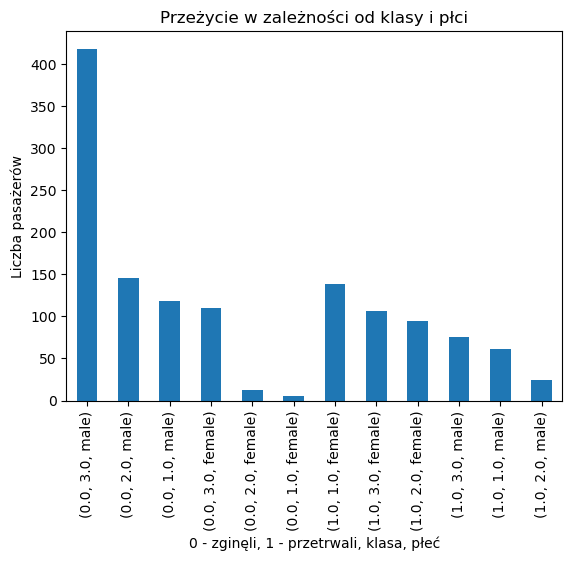

In [20]:
df.groupby('survived')[['pclass', 'sex']].value_counts().plot(kind='bar')
plt.xlabel('0 - zginęli, 1 - przetrwali, klasa, płeć')
plt.ylabel('Liczba pasażerów')
plt.title('Przeżycie w zależności od klasy i płci')
plt.show()

- Przewaga liczby kobiet, które przetrwały, nad mężczyznami. Już na tym etapie można zaobserwować, że wyższa klasa biletu mogła przełożyć się na większe szanse przeżycia


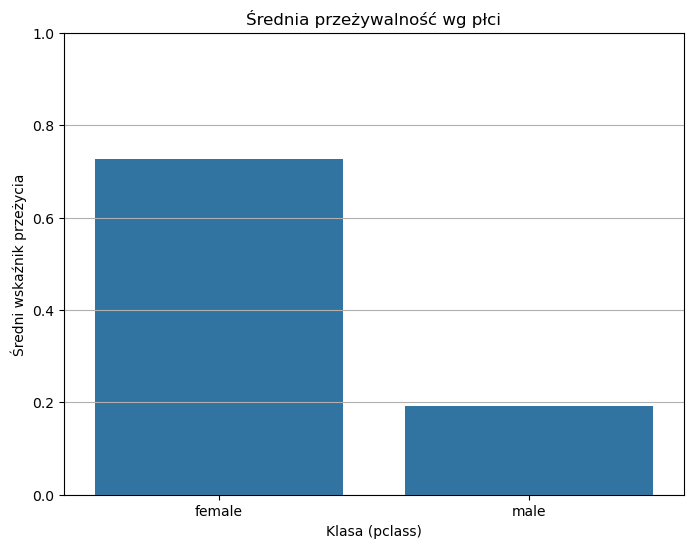

In [21]:
# Średnia przeżywalność wg płci
plt.figure(figsize=(8, 6))
sns.barplot(x="sex", y="survived", data=df, errorbar=None)

plt.title("Średnia przeżywalność wg płci")
plt.xlabel("Klasa (pclass)")
plt.ylabel("Średni wskaźnik przeżycia")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


- Pamiętając, że na statku było więcej mężczyzn, to z zaokrągleniem można stwierdzić, że przeżył co piąty mężczyzna, a tylko co czwarta kobieta zginęła w katastrofie.

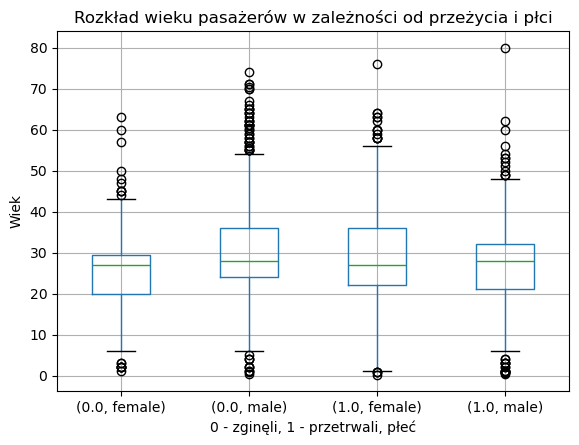

In [22]:
df.boxplot(column='age', by=['survived', 'sex'])
plt.suptitle('')  # Usuwa automatyczny tytuł generowany przez Pandas
plt.xlabel('0 - zginęli, 1 - przetrwali, płeć')
plt.ylabel('Wiek')
plt.title('Rozkład wieku pasażerów w zależności od przeżycia i płci')
plt.show()

Wskaźnik przeżycia względem wieku rozkłada się dość równomiernie (prawie identycznie dla osób, które przeżyły i te, którym się to nie udało). Wygląda na to, że wiek (a co za tym idzie - sprawność fizyczna osoby) nie miały wpływy na przeżywalność w katastrofie.
- Wiek pasażerów znacząco nie wpływał na szanse przeżycia. Widać tylko małe różnice. Kobiety, które przeżyły były statystycznie nieznacznie starsze, od tych, które zginęły. Natomiast wśród mężczyzn zależność ta jest odwrotna i to mniej widoczna.

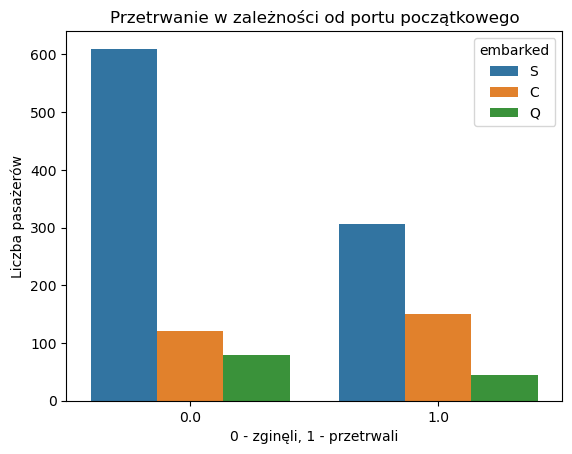

In [23]:
sns.countplot(x='survived', hue='embarked', data=df)
plt.xlabel('0 - zginęli, 1 - przetrwali')
plt.ylabel('Liczba pasażerów')
plt.title('Przetrwanie w zależności od portu początkowego')
plt.show()

- Ciekawie rozkłada się przeżycie w zależności od portu w którym zaczęli swoją podróż poszczególni pasażerowie. Większość z miasta Cherbourg przetrwała.

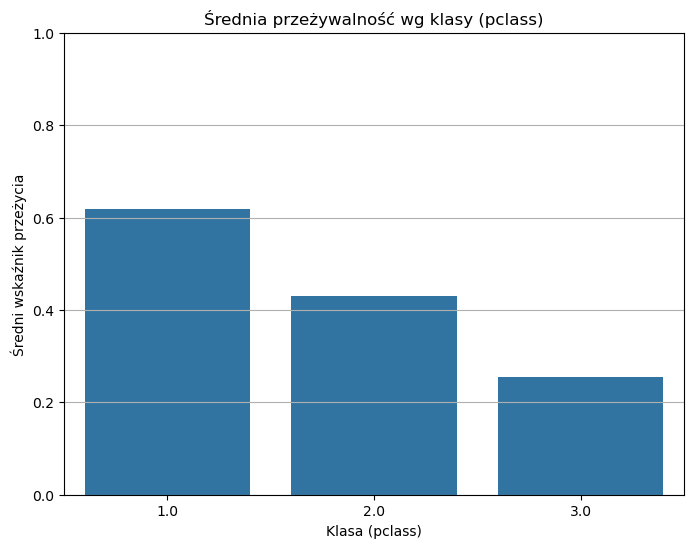

In [28]:
# Średnia przeżywalność wg klasy (pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x="pclass", y="survived", data=df, errorbar=None)

plt.title("Średnia przeżywalność wg klasy (pclass)")
plt.xlabel("Klasa (pclass)")
plt.ylabel("Średni wskaźnik przeżycia")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

Największe szanse na przeżycie miały osoby, które wykupiły bilet klasy 1. Im niższa klasa tym niższe szanse na przeżycie

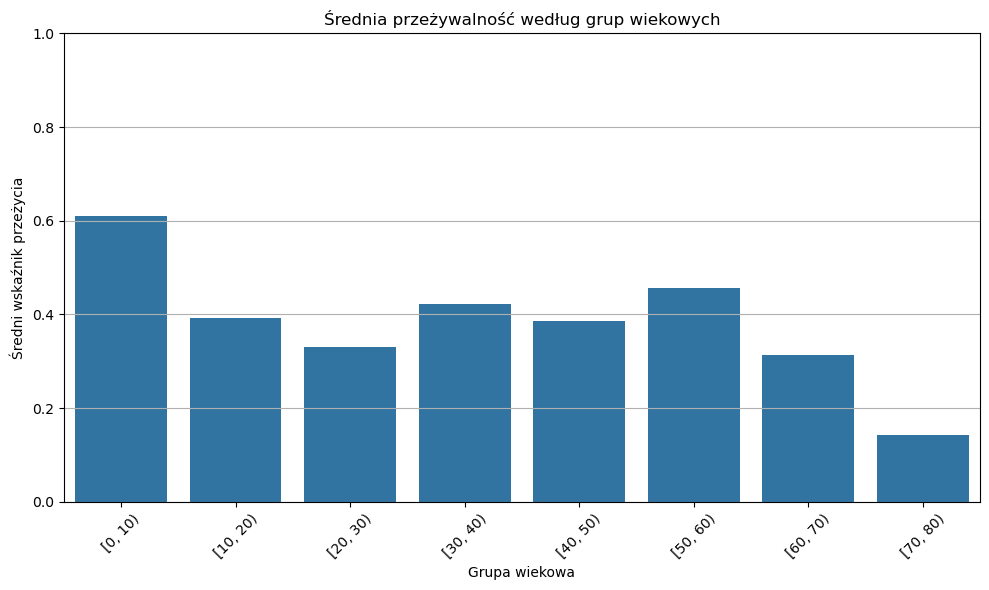

In [25]:
# Średnia przeżywalność wg wieku

# Usuwamy brakujące wartości wieku
df_age = df[['age', 'survived']].dropna()

# Tworzymy grupy wiekowe (biny co 10 lat)
age_bins = pd.cut(df_age['age'], bins=range(0, 90, 10), right=False)

# Dodajemy kolumnę z grupą wiekową
df_age['age_group'] = age_bins

# Rysujemy barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='survived', data=df_age, errorbar=None)

plt.title("Średnia przeżywalność według grup wiekowych")
plt.xlabel("Grupa wiekowa")
plt.ylabel("Średni wskaźnik przeżycia")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Rozkład wiekowy przeżywalności według wieku wydaje się dość równomierny, z wyjątkiem najmłodszych (mają duży procent szans na przeżycie) oraz najstarszych (mają wyraźnie mniejsze szanse na przeżycie)

### Macierz korelacji

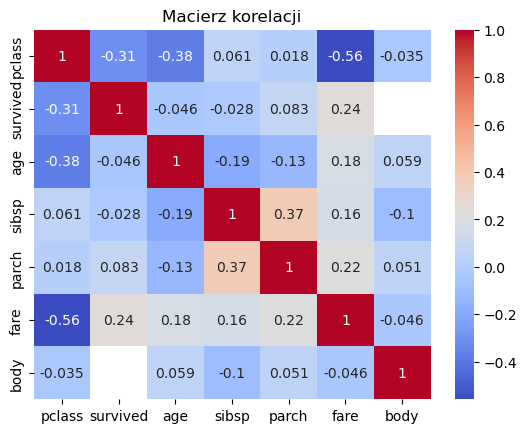

In [26]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

- Największą korelację wykazuje cena biletu z klasą. Co jest obserwacją oczywistą, chociaż można by się spodziewać, że będzie ona silniejsza niż -0,56.
- Podstawową badaną cechą jest przeżywalność. I tutaj nie widzimy mocnych korelacji. Występują tylko mniej widoczne:
  - przeżycie od klasy - im niższa klasa, tym większe szanse na przeżycie, ale wartość to tylko -0,31,
  - szansa przeżycia powoli też rosła wraz z ceną biletu,
  - pozostałe wartości praktycznie nie wykazują korelacji z przeżywalnością.
- Widoczna jest też korelacja między klasą a wiekiem pasażera. Im klasa liczbowo większa, tym pasażer był młodszy.

# Krok 5 - Podsumowanie


Z analizy wynika że posiadanie biletu wyższej klasy zwiększało szans na przeżycie. Kobiet przeżyło o ponad połowę wiećej niż mężczyzn, co mogło wynikać z pierwszeństwa kobiet w trakcie ewakuacji. Kobiety też miały większą szansę na przeżycie (głównie te starsze). Co ciekawe wśród mężczyzn, większą szansę na przeżycie mieli młodsi mężczyźni niż starsi. Możliwe, że to wynik ewentualnej paniki w końcowej fazie ewakuacji.

# Podsumowanie analizy

Analiza wykazała silne powiązania pewnych wskaźników, które już intuicyjnie podpowiadają, że mogą przyczynić się do uratowania się w ewentualnej katastrofie statku. Widać, że większe szanse mają osoby które więcej zapłaciły za bilet (a co za tym idzie miały przypisaną łódź i kabinę), miały większą szansę na przeżycie. Bycie starszą kobietą też dawało większe szanse (prawdopodobnie były w pierwszej kolejności traktowane i ewakuowane). Generalnie kobiety miały większą szansę na przeżycie. Gdy przyszła kolej ewakuacji mężczyzna, okazało się że większą szansę mieli młodsi mężczyźni. Podejrzewam, że może to wynikać z tego, że gdy brakło już łodzi, młodzi mężczyźni mieli szansę przeżyć wyskakując ze statku (może udało im się jeszcze dopłynąć do jakiejś łodzi lub przytrzymać się czegoś co pływało. Starsi mężczyźni mogli sobie nie poradzić w takiej sytuacji. Generalnie rozkład przeżywalności według wieku wydaje się dość równomierny, z wyjątkiem najmłodszych (mają największy procent szans na przeżycie) oraz najstarszych (ogólnie mają wyraźnie mniejsze szanse na przeżycie - wyjątkiem są starsze kobiety)